In [149]:
import numpy as np
import pandas as pd
from IPython.core.display import display
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
import warnings
import classifier_utils
import seaborn as sns
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, GridSearchCV, validation_curve
from sklearn.impute import SimpleImputer
import math

In [2]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [3]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

In [27]:
df_training = pd.read_csv("../../data/dataset-training.csv")
df_na = df_training[df_training.isna().any(axis=1)]

len(df_na) / len(df_training)

0.28144947636066214

# Missing values

In [37]:
df_training.shape

(56241, 98)

In [42]:
df_training.shape[0]

56241

In [38]:
df_training.count()

chunk_id              56241
developerdecision     56241
line_start            56241
line_end              56241
line_separator        56241
                      ...  
Static initializer    56241
Do statement          56241
Method declaration    56241
Attribute             56241
Catch clause          56241
Length: 98, dtype: int64

array([[<AxesSubplot:title={'center':'number of missing values in an attribute'}>]],
      dtype=object)

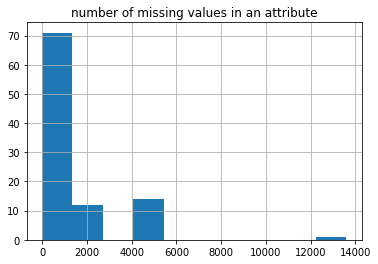

In [244]:
pd.DataFrame({'number of missing values in an attribute': df_training.count()})\
.apply(lambda x: df_training.shape[0] - x).hist()

In [198]:
# # histogram of attributes

# columns_size = df_training.columns.size
# cols = 3
# rows = math.ceil(columns_size / cols)

# df_training.hist(figsize=(50,200), layout=(rows, cols))

### Missing values count (for each attribute)

<AxesSubplot:>

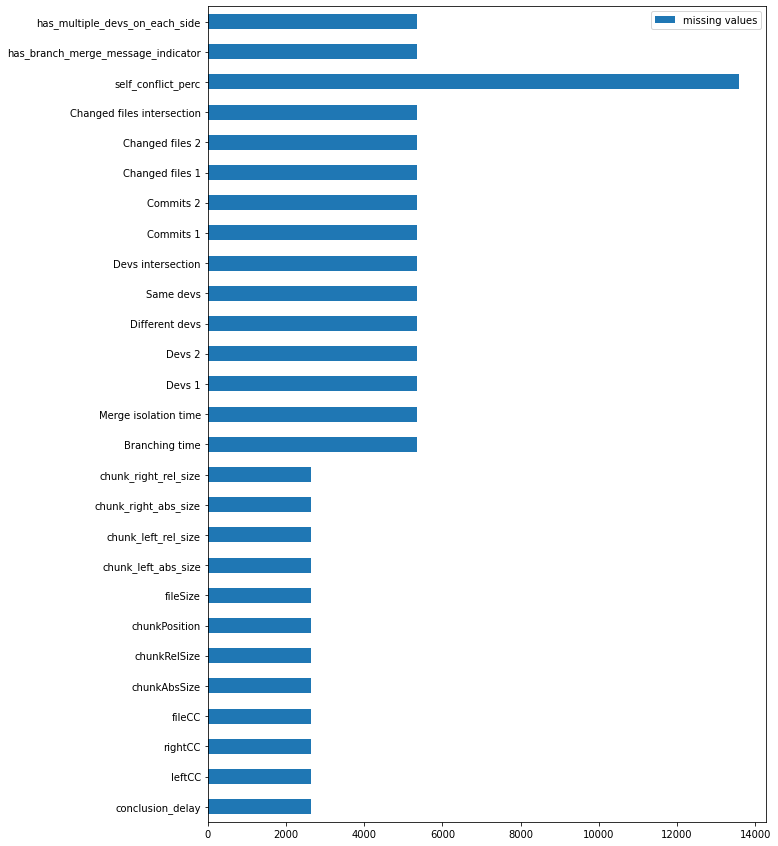

In [190]:
df_count = pd.DataFrame(df_training.count())\
    .apply(lambda x: df_training.shape[0] - x)

df_count.rename(columns={0:'missing values'}, inplace=True )

# df_count\
df_count[df_count['missing values'] != 0]\
.plot.barh(figsize=(10,15))

In [194]:
attrs_NA_percentage = df_count[df_count['missing values'] != 0].shape[0] / df_training.columns.size
attrs_NA_percentage

0.2755102040816326

In [195]:
print(f"{attrs_NA_percentage * 100 : .2f}% of attributes have missing values.")

 27.55% of attributes have missing values.


### Missing values percentage (for each attribute)

<AxesSubplot:>

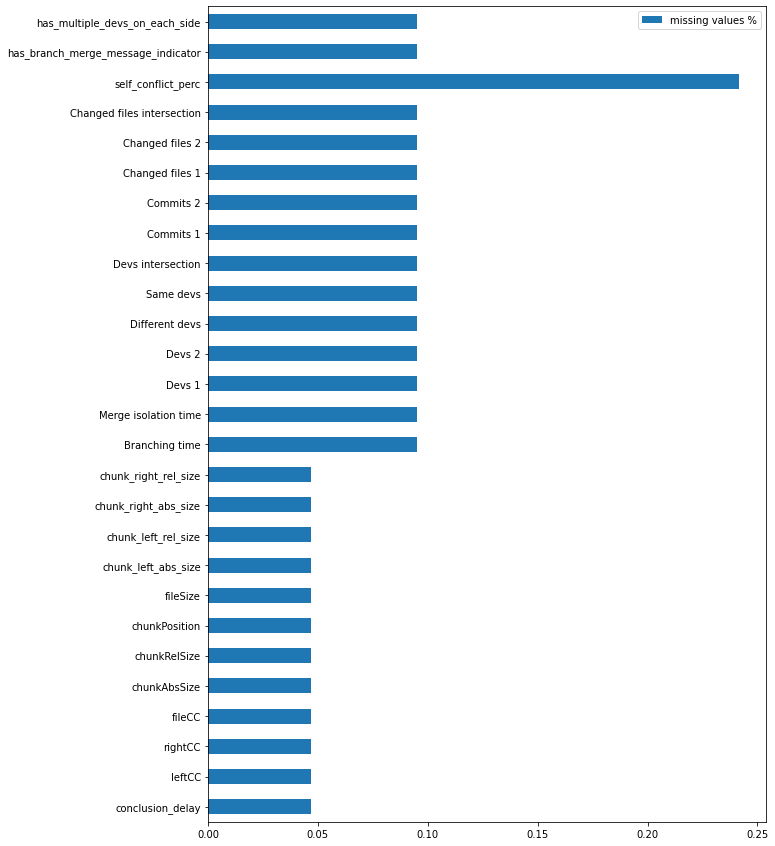

In [189]:
training_rows = df_training.shape[0]

df_count_perc = pd.DataFrame(df_training.count())\
    .apply(lambda x: (training_rows - x) / training_rows)

df_count_perc.rename(columns={0:'missing values %'}, inplace=True )

# df_count\
df_count_perc[df_count_perc['missing values %'] != 0]\
.plot.barh(figsize=(10,15))

In [72]:
df_count_pos = df_count[df_count['missing values'] != 0]
df_count_pos

,missing values
conclusion_delay,2630
leftCC,2625
rightCC,2625
fileCC,2625
chunkAbsSize,2625
chunkRelSize,2625
chunkPosition,2625
fileSize,2625
chunk_left_abs_size,2625
chunk_left_rel_size,2625


In [80]:
columns_NA = df_count_pos.index.values.tolist()
columns_NA

['conclusion_delay',
 'leftCC',
 'rightCC',
 'fileCC',
 'chunkAbsSize',
 'chunkRelSize',
 'chunkPosition',
 'fileSize',
 'chunk_left_abs_size',
 'chunk_left_rel_size',
 'chunk_right_abs_size',
 'chunk_right_rel_size',
 'Branching time',
 'Merge isolation time',
 'Devs 1',
 'Devs 2',
 'Different devs',
 'Same devs',
 'Devs intersection',
 'Commits 1',
 'Commits 2',
 'Changed files 1',
 'Changed files 2',
 'Changed files intersection',
 'self_conflict_perc',
 'has_branch_merge_message_indicator',
 'has_multiple_devs_on_each_side']

In [84]:
df_training[columns_NA].dtypes

conclusion_delay                      float64
leftCC                                float64
rightCC                               float64
fileCC                                float64
chunkAbsSize                          float64
chunkRelSize                          float64
chunkPosition                         float64
fileSize                              float64
chunk_left_abs_size                   float64
chunk_left_rel_size                   float64
chunk_right_abs_size                  float64
chunk_right_rel_size                  float64
Branching time                        float64
Merge isolation time                  float64
Devs 1                                float64
Devs 2                                float64
Different devs                        float64
Same devs                             float64
Devs intersection                     float64
Commits 1                             float64
Commits 2                             float64
Changed files 1                   

### Filling missing values with a constant value

In [199]:
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)

# fill missing values with -1
df_constant = pd.DataFrame(imp_constant.fit_transform(df_training),
                           columns = df_training.columns)


Before filling missing values:

array([[<AxesSubplot:title={'center':'number of missing values in an attribute'}>]],
      dtype=object)

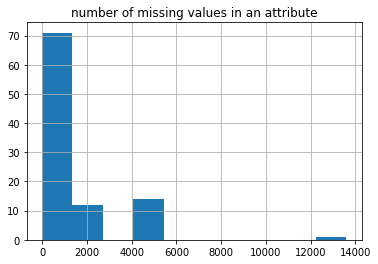

In [245]:
pd.DataFrame({'number of missing values in an attribute': df_training.count()})\
.apply(lambda x: df_training.shape[0] - x).hist()

After filling missing values:

array([[<AxesSubplot:title={'center':'number of missing values in an attribute'}>]],
      dtype=object)

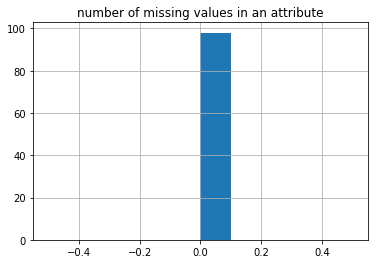

In [246]:
pd.DataFrame({'number of missing values in an attribute': df_constant.count()})\
.apply(lambda x: df_training.shape[0] - x).hist()

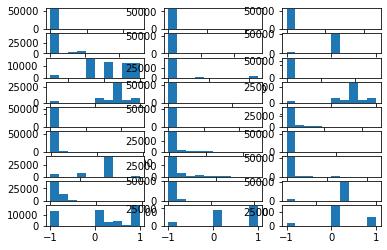

In [229]:
# TODO: configure subplot to show larger histograms with a label

columns_size = len(columns_NA)
cols = 3
rows = math.ceil(columns_size / cols)

for i, column in enumerate(columns_NA):
    plt.subplot(rows, cols, i+1)
    plt.hist(df_constant[column]) 

# Class distributions

### Normalized (%)

In [4]:
class_distribution_normalized = classifier_utils.get_projects_class_distribution(projects)

class_distribution_normalized

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,43.87,29.25,8.43,1.32,0.92,16.07,0.13
1,apache/directory-server,47.39,51.23,0.15,0.00,0.00,1.23,0.00
2,android/platform_frameworks_base,70.77,7.64,9.02,2.68,1.42,8.13,0.33
3,freenet/fred,40.42,16.50,23.32,6.23,0.49,12.94,0.10
4,alexo/wro4j,30.70,14.77,28.65,0.88,1.02,23.61,0.37
5,apache/lucene-solr,25.05,26.59,20.33,5.24,0.31,21.66,0.82
6,elastic/elasticsearch,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,getrailo/railo,31.99,37.76,8.74,7.17,0.35,13.81,0.17
8,atlasapi/atlas,24.04,44.50,12.40,5.37,0.90,12.53,0.26
9,hibernate/hibernate-orm,23.88,20.11,31.15,7.40,1.12,14.11,2.23


### Count

In [5]:
class_distribution_count = classifier_utils.get_projects_class_distribution(projects, False)

class_distribution_count

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,333,222,64,10,7,122,1
1,apache/directory-server,309,334,1,0,0,8,0
2,android/platform_frameworks_base,1741,188,222,66,35,200,8
3,freenet/fred,409,167,236,63,5,131,1
4,alexo/wro4j,420,202,392,12,14,323,5
5,apache/lucene-solr,244,259,198,51,3,211,8
6,elastic/elasticsearch,0,0,0,0,0,0,0
7,getrailo/railo,183,216,50,41,2,79,1
8,atlasapi/atlas,188,348,97,42,7,98,2
9,hibernate/hibernate-orm,171,144,223,53,8,101,16


# Decision Tree

### Base classifier

In [6]:
dt = DecisionTreeClassifier(min_samples_split=5, random_state=99)

In [7]:
type(dt).__name__

'DecisionTreeClassifier'

In [8]:
result_dt = classifier_utils.ProjectsResults(dt, projects, non_features_columns)

In [9]:
report_dt = result_dt.get_report_df()

report_dt


,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
26,CCI-MIT__XCoLab,5512,3757,0.973,0.971,0.972,0.971,0.573,0.931
1,apache__directory-server,845,652,0.922,0.923,0.923,0.923,0.512,0.843
24,jgralab__jgralab,2072,1802,0.823,0.819,0.820,0.819,0.491,0.643
19,Unidata__thredds,1154,950,0.902,0.901,0.901,0.901,0.777,0.557
18,apache__accumulo,4113,3148,0.838,0.835,0.836,0.835,0.635,0.548
10,CloudStack-extras__CloudStack-archive,1424,1106,0.699,0.700,0.699,0.700,0.437,0.467
0,Ramblurr__Anki-Android,892,759,0.678,0.681,0.679,0.681,0.439,0.432
5,apache__lucene-solr,1256,974,0.573,0.568,0.569,0.568,0.266,0.411
7,getrailo__railo,815,572,0.636,0.631,0.633,0.631,0.378,0.407
11,TeamDev-Ltd__OpenFaces,2979,2859,0.964,0.963,0.964,0.963,0.938,0.403


### Inspect project

In [10]:
sample_project_dt = result_dt.get_project('sebastianbenz__Jnario')

In [15]:
project = 'sebastianbenz__Jnario'
project_dataset = f"../../data/projects/{project}-training.csv"
df = pd.read_csv(project_dataset)
df_na = df[df.isna().any(axis=1)]
df_na

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha,left_lines_added,left_lines_removed,right_lines_added,right_lines_removed,conclusion_delay,keyword_fix,keyword_bug,keyword_feature,keyword_improve,keyword_document,keyword_refactor,keyword_update,keyword_add,keyword_remove,keyword_use,keyword_delete,keyword_change,leftCC,rightCC,fileCC,chunkAbsSize,chunkRelSize,chunkPosition,fileSize,chunk_left_abs_size,chunk_left_rel_size,chunk_right_abs_size,chunk_right_rel_size,Branching time,Merge isolation time,Devs 1,Devs 2,Different devs,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side,If statement,Enum signature,Package declaration,Break statement,Import,Enum value,Annotation,Throw statement,Annotation declaration,Class signature,Try statement,TypeDeclarationStatement,Comment,Assert statement,Class declaration,Cast expression,Array access,Enum declaration,For statement,Method invocation,Return statement,Interface signature,Variable,Method interface,Case statement,Interface declaration,Continue statement,While statement,Synchronized statement,Method signature,Other,Blank,Array initializer,Switch statement,Static initializer,Do statement,Method declaration,Attribute,Catch clause,birgit.engelmann@bmw-carit.de,sebastian.benz@gmail.com
28,1346936,Version 1,0,10,1,"Comment, Package declaration",https://github.com/sebastianbenz/Jnario,sebastianbenz/Jnario,sebastianbenz,Jnario,sebastianbenz/Jnario/org.jnario.spec/src-gen/o...,InternalSpecLexer.java,1a1a1c10fad6d9d9d943cffb0f1b9ef238119bab,55a2a0bdabb418e443051c8cc67170a30b5f2549,8f2097cb7c88e1b9d3d1fb11f2f35c3612e0f8d1,a5fcdd33ee65e09f3ac6a4e8444b4ede74db1bdb,430.0,456.0,99854.0,152948.0,16.0,15.0,1.0,8.0,2.0,1.0,1.0,5.0,10.0,3.0,1.0,0.0,3.0,0.0,1.0,883.0,8.0,0.001352,1.0,5919.0,0.0,0.000000,8.0,1.000000,27.725035,27.987141,2.0,2.0,4.0,2.0,2.0,70.0,5.0,630.0,86.0,1.0,NaN,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44,1352226,Version 1,32617,32652,32629,"Comment, Do statement, If statement, Method in...",https://github.com/sebastianbenz/Jnario,sebastianbenz/Jnario,sebastianbenz,Jnario,sebastianbenz/Jnario/org.jnario.feature/src-ge...,InternalFeatureParser.java,7a9c34eda1a1853068fb933248418e9a6ffbab64,79682dfb8c77c81c09dba5ad10201c2f77250e92,5dd127d3bf102bb1a1b802e66da64dce6c359f02,2692a1d564a9fcb5c965824220c526ce9c81e924,46.0,1131.0,76288.0,87430.0,20.0,11.0,0.0,2.0,5.0,5.0,1.0,3.0,17.0,2.0,1.0,0.0,0.0,4.0,5.0,6040.0,33.0,0.000758,3.0,43523.0,11.0,0.333333,22.0,0.666667,20.910833,21.574421,2.0,1.0,3.0,1.0,1.0,61.0,2.0,1273.0,36.0,1.0,NaN,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
51,1350946,Version 1,2599,2603,2601,Comment,https://github.com/sebastianbenz/Jnario,sebastianbenz/Jnario,sebastianbenz,Jnario,sebastianbenz/Jnario/org.jnario.feature/src-ge...,InternalFeatureLexer.java,7a9c34eda1a1853068fb933248418e9a6ffbab64,79682dfb8c77c81c09dba5ad10201c2f77250e92,5dd127d3bf102bb1a1b802e66da64dce6c359f02,2692a1d564a9fcb5c965824220c526ce9c81e924,46.0,1131.0,76288.0,87430.0,20.0,11.0,0.0,2.0,5.0,5.0,1.0,3.0,17.0,2.0,1.0,0.0,0.0,1.0,1.0,972.0,2.0,0.000293,2.0,6817.0,1.0,0.500000,1.0,0.500000,20.910833,21.574421,2.0,1.0,3.0,1.0,1.0,61.0,2.0,1273.0,36.0,1.0,NaN,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
56,1357281,Version 1,132,142,141,"Comment, Method declaration",https://github.com/sebastianbenz/Jnario,sebastianbenz/Jnario,sebastianbenz,Jnario,sebastianbenz/Jnario/org.jnario.spec/src-gen/o...,AbstractSpecSyntacticSequencer.java,7a9c34eda1a1853068fb933248418e9a6ffbab64,79682dfb8c77c81c09dba5ad10201c2f77250e92,5dd127d3bf102bb1a1b802e66da64dce6c359f02,2692a1d564a9fcb5c965824220c526ce9c81e924,46.0,1131.0,76288.0,87430.0,20.

In [16]:
pd.DataFrame(df.dtypes).transpose()

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha,left_lines_added,left_lines_removed,right_lines_added,right_lines_removed,conclusion_delay,keyword_fix,keyword_bug,keyword_feature,keyword_improve,keyword_document,keyword_refactor,keyword_update,keyword_add,keyword_remove,keyword_use,keyword_delete,keyword_change,leftCC,rightCC,fileCC,chunkAbsSize,chunkRelSize,chunkPosition,fileSize,chunk_left_abs_size,chunk_left_rel_size,chunk_right_abs_size,chunk_right_rel_size,Branching time,Merge isolation time,Devs 1,Devs 2,Different devs,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side,If statement,Enum signature,Package declaration,Break statement,Import,Enum value,Annotation,Throw statement,Annotation declaration,Class signature,Try statement,TypeDeclarationStatement,Comment,Assert statement,Class declaration,Cast expression,Array access,Enum declaration,For statement,Method invocation,Return statement,Interface signature,Variable,Method interface,Case statement,Interface declaration,Continue statement,While statement,Synchronized statement,Method signature,Other,Blank,Array initializer,Switch statement,Static initializer,Do statement,Method declaration,Attribute,Catch clause,birgit.engelmann@bmw-carit.de,sebastian.benz@gmail.com
0,int64,object,int64,int64,int64,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [17]:
pd.DataFrame(df.dtypes).groupby(df.dtypes).size()

int64      45
float64    43
object     12
dtype: int64

In [21]:
df[df['path'].isna()]

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha,left_lines_added,left_lines_removed,right_lines_added,right_lines_removed,conclusion_delay,keyword_fix,keyword_bug,keyword_feature,keyword_improve,keyword_document,keyword_refactor,keyword_update,keyword_add,keyword_remove,keyword_use,keyword_delete,keyword_change,leftCC,rightCC,fileCC,chunkAbsSize,chunkRelSize,chunkPosition,fileSize,chunk_left_abs_size,chunk_left_rel_size,chunk_right_abs_size,chunk_right_rel_size,Branching time,Merge isolation time,Devs 1,Devs 2,Different devs,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side,If statement,Enum signature,Package declaration,Break statement,Import,Enum value,Annotation,Throw statement,Annotation declaration,Class signature,Try statement,TypeDeclarationStatement,Comment,Assert statement,Class declaration,Cast expression,Array access,Enum declaration,For statement,Method invocation,Return statement,Interface signature,Variable,Method interface,Case statement,Interface declaration,Continue statement,While statement,Synchronized statement,Method signature,Other,Blank,Array initializer,Switch statement,Static initializer,Do statement,Method declaration,Attribute,Catch clause,birgit.engelmann@bmw-carit.de,sebastian.benz@gmail.com


In [13]:
len(df_na) / len(df)


0.015063870812243915

,precision,recall,f1-score,support
Combination,0.000000,0.000000,0.000000,1.000000
Manual,0.000000,0.000000,0.000000,5.000000
None,0.000000,0.000000,0.000000,1.000000
Version 1,0.999143,0.999510,0.999327,8166.000000
accuracy,0.998654,0.998654,0.998654,0.998654
macro avg,0.249786,0.249878,0.249832,8173.000000
weighted avg,0.998287,0.998654,0.998471,8173.000000


None

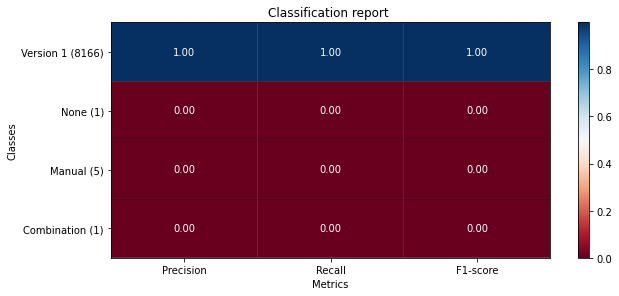

In [17]:
display(sample_project_dt.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project_dt.scores))

### Tuning hyperparameters


In [229]:
print("Hyperparameters of Decision Tree:")
dt.get_params()

Hyperparameters of Decision Tree:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 99,
 'splitter': 'best'}

#### Using GridSearch to explore combinations of hyperparameters in one project

In [234]:
project = projects[0]
print("Project: ", project, "\n")

parameters_dt = {'criterion':('gini', 'entropy'),
              'min_samples_leaf':[1, 2, 3],
              # 'max_depth':[None, 3, 5, 10],
              'max_depth':[None, 5, 20, 30]
                 }

result_dt = classifier_utils.grid_search(project, dt, parameters_dt, non_features_columns)

df_gridsearch_dt = pd.DataFrame(result_dt)\
    .filter(regex=("param_.*|mean_test_score|std_test_score|rank_test_score"))\
    .sort_values(by=['rank_test_score'])

df_gridsearch_dt

Project:  Ramblurr/Anki-Android 

Length of df_clean: 759
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best params and score:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
0.6917719298245614




,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
16,entropy,5,2,0.691772,0.048207,1
15,entropy,5,1,0.691772,0.047117,1
17,entropy,5,3,0.690456,0.047126,3
21,entropy,30,1,0.681070,0.047340,4
18,entropy,20,1,0.681070,0.047340,4
12,entropy,None,1,0.681070,0.047340,4
0,gini,None,1,0.681053,0.058606,7
9,gini,30,1,0.681053,0.058606,7
3,gini,5,1,0.679895,0.049639,9
4,gini,5,2,0.679895,0.049639,9


#### Validation curves

##### min_samples_leaf

min_samples_leaf : int or float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

Length of df_clean: 759



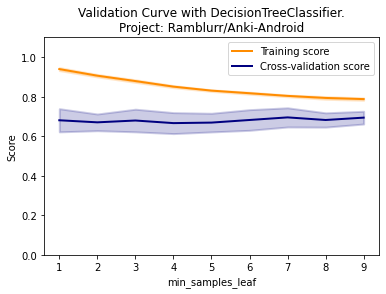

Length of df_clean: 652



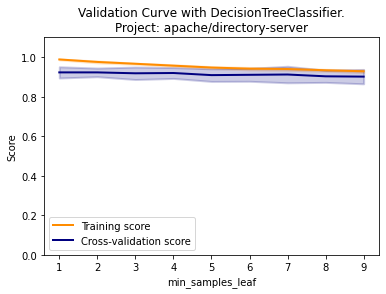

Length of df_clean: 2460



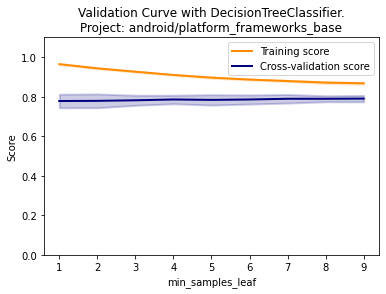

In [235]:
for i, project in enumerate(projects[:3]):
    classifier_utils.get_validation_curve(project, dt, 'min_samples_leaf',
                                        np.arange(1, 10, 1),
                                        non_features_columns)

##### criterion

criterion : {“gini”, “entropy”}, default=”gini”

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

Length of df_clean: 759



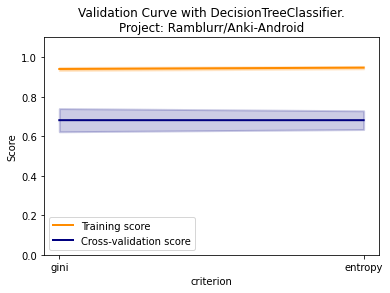

Length of df_clean: 652



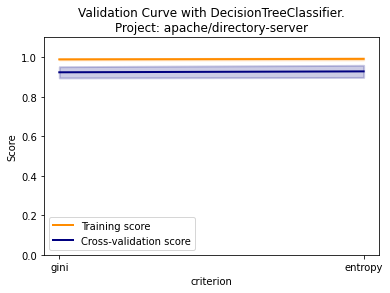

Length of df_clean: 2460



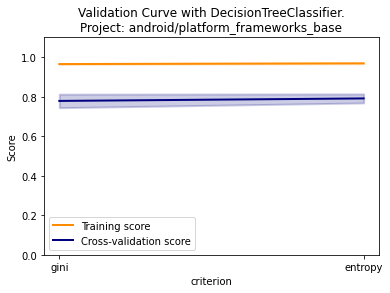

In [236]:
for i, project in enumerate(projects[:3]):
    classifier_utils.get_validation_curve(project, dt, 'criterion',
                                        ('gini', 'entropy'),
                                        non_features_columns)

#### max_depth

max_depth : int, default=None

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Length of df_clean: 759



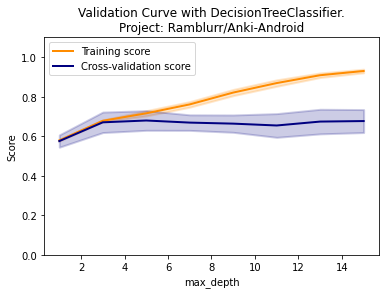

Length of df_clean: 652



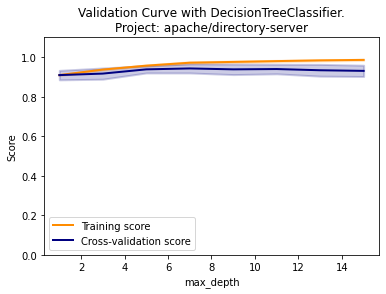

Length of df_clean: 2460



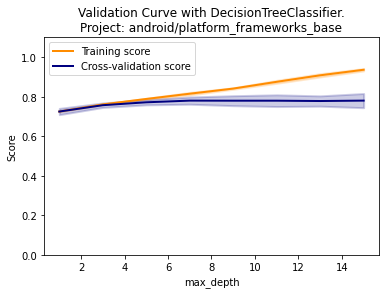

In [239]:
for i, project in enumerate(projects[:3]):
    classifier_utils.get_validation_curve(project, dt, 'max_depth',
                                        [1, 3, 5, 7, 9, 11, 13, 15],
                                        non_features_columns)

# Random Forest

### Base classifier

In [112]:
rf = RandomForestClassifier(random_state=99)
result_rf = classifier_utils.ProjectsResults(rf, projects, non_features_columns)

In [ ]:
report_rf = result_rf.get_report_df()

report_rf

### Inspect project

In [ ]:
sample_project_rf = result_rf.get_project('alexo__wro4j')

In [ ]:
display(sample_project_rf.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project_rf.scores))

### Tuning hyperparameters

In [240]:
print("Hyperparameters of Random Forest:")

rf.get_params()

Hyperparameters of Random Forest:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 99,
 'verbose': 0,
 'warm_start': False}

#### Using GridSearch to explore combinations of hyperparameters in one project

In [242]:
parameters_rf = {
                # 'criterion':('gini', 'entropy'),
              'min_samples_leaf':[1, 2, 3],
              'max_depth':[None, 10, 20, 30],
              'n_estimators': [10, 50, 100, 150, 200]
              # 'n_estimators': [100, 200]
                 }

proj = projects[16]

result_rf = classifier_utils.grid_search(proj, rf, parameters_rf, non_features_columns)

df_gridsearch_rf = pd.DataFrame(result_rf)\
    .filter(regex=("param_.*|mean_test_score|std_test_score|rank_test_score"))\
    .sort_values(by=['rank_test_score'])

df_gridsearch_rf.insert(0, 'project', proj)

df_gridsearch_rf



Length of df_clean: 977
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best params and score:
{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
0.951883021249737




,project,param_max_depth,param_min_samples_leaf,param_n_estimators,mean_test_score,std_test_score,rank_test_score
4,SINTEF-9012/ThingML,None,1,200,0.951883,0.015928,1
49,SINTEF-9012/ThingML,30,1,200,0.951883,0.015928,1
34,SINTEF-9012/ThingML,20,1,200,0.951883,0.015928,1
55,SINTEF-9012/ThingML,30,3,10,0.949853,0.013246,4
40,SINTEF-9012/ThingML,20,3,10,0.949853,0.013246,4
10,SINTEF-9012/ThingML,None,3,10,0.949853,0.013246,4
51,SINTEF-9012/ThingML,30,2,50,0.949842,0.017408,7
3,SINTEF-9012/ThingML,None,1,150,0.949842,0.017996,7
6,SINTEF-9012/ThingML,None,2,50,0.949842,0.017408,7
48,SINTEF-9012/ThingML,30,1,150,0.949842,0.017996,7


### GridSearch of parameter n_estimators on first 10 projects

In [243]:
parameters_rf = {
                # 'criterion':('gini', 'entropy'),
              # 'min_samples_leaf':[1, 2, 3],
              # 'max_depth':[None, 10, 20, 30],
              # 'n_estimators': [10, 50, 90, 100, 110, 150, 200]
              'n_estimators': [50, 100, 150, 200]
                 }

dfs = []

for project in projects[:10]:
    print("\n=== ", project, " ===")
    result = classifier_utils.grid_search(project, rf, parameters_rf, non_features_columns)
    if result != None:
        df_gridsearch_proj = pd.DataFrame(result)\
            .filter(regex=("param_.*|mean_test_score|std_test_score|rank_test_score"))\
            .sort_values(by=['rank_test_score'])
        df_gridsearch_proj.insert(0, 'project', project.replace("/", "__"))
        # print(df_gridsearch_proj)
        display(df_gridsearch_proj)
        dfs.append(df_gridsearch_proj)

large_df = pd.concat(dfs, ignore_index=True)

large_df


===  Ramblurr/Anki-Android  ===
Length of df_clean: 759
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 100}
0.7444035087719298




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,Ramblurr__Anki-Android,100,0.744404,0.048569,1
3,Ramblurr__Anki-Android,200,0.741772,0.045988,2
2,Ramblurr__Anki-Android,150,0.740439,0.048582,3
0,Ramblurr__Anki-Android,50,0.739140,0.055083,4



===  apache/directory-server  ===
Length of df_clean: 652
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 50}
0.9294871794871795




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,apache__directory-server,50,0.929487,0.031430,1
3,apache__directory-server,200,0.927949,0.029780,2
2,apache__directory-server,150,0.926410,0.030383,3
1,apache__directory-server,100,0.924872,0.030898,4



===  android/platform_frameworks_base  ===
Length of df_clean: 2460
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 150}
0.8073170731707318




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
2,android__platform_frameworks_base,150,0.807317,0.020823,1
3,android__platform_frameworks_base,200,0.807317,0.018107,1
0,android__platform_frameworks_base,50,0.804065,0.014175,3
1,android__platform_frameworks_base,100,0.803252,0.017644,4



===  freenet/fred  ===
Length of df_clean: 1012
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 200}
0.679800038827412




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
3,freenet__fred,200,0.679800,0.038946,1
1,freenet__fred,100,0.678810,0.046758,2
2,freenet__fred,150,0.677830,0.036579,3
0,freenet__fred,50,0.671899,0.046203,4



===  alexo/wro4j  ===
Length of df_clean: 1368
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 150}
0.5898829969944182




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
2,alexo__wro4j,150,0.589883,0.033236,1
3,alexo__wro4j,200,0.589878,0.029411,2
0,alexo__wro4j,50,0.584054,0.039469,3
1,alexo__wro4j,100,0.581129,0.028979,4



===  apache/lucene-solr  ===
Length of df_clean: 974
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 100}
0.6499579213128551




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,apache__lucene-solr,100,0.649958,0.045253,1
0,apache__lucene-solr,50,0.647843,0.043208,2
3,apache__lucene-solr,200,0.639701,0.043230,3
2,apache__lucene-solr,150,0.637629,0.041541,4



===  elastic/elasticsearch  ===
Length of df_clean: 0

===  getrailo/railo  ===
Length of df_clean: 572
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 150}
0.7095583787053841




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
2,getrailo__railo,150,0.709558,0.063184,1
0,getrailo__railo,50,0.706110,0.050946,2
1,getrailo__railo,100,0.704356,0.058114,3
3,getrailo__railo,200,0.702662,0.052603,4



===  atlasapi/atlas  ===
Length of df_clean: 782
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 100}
0.6624148003894839




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,atlasapi__atlas,100,0.662415,0.058374,1
2,atlasapi__atlas,150,0.661133,0.053968,2
3,atlasapi__atlas,200,0.658601,0.061218,3
0,atlasapi__atlas,50,0.654755,0.061796,4



===  hibernate/hibernate-orm  ===
Length of df_clean: 716
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 200}
0.5937793427230047




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
3,hibernate__hibernate-orm,200,0.593779,0.049649,1
2,hibernate__hibernate-orm,150,0.591002,0.055683,2
0,hibernate__hibernate-orm,50,0.589652,0.054236,3
1,hibernate__hibernate-orm,100,0.589613,0.057234,4


,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,Ramblurr__Anki-Android,100,0.744404,0.048569,1
1,Ramblurr__Anki-Android,200,0.741772,0.045988,2
2,Ramblurr__Anki-Android,150,0.740439,0.048582,3
3,Ramblurr__Anki-Android,50,0.739140,0.055083,4
4,apache__directory-server,50,0.929487,0.031430,1
5,apache__directory-server,200,0.927949,0.029780,2
6,apache__directory-server,150,0.926410,0.030383,3
7,apache__directory-server,100,0.924872,0.030898,4
8,android__platform_frameworks_base,150,0.807317,0.020823,1
9,android__platform_frameworks_base,200,0.807317,0.018107,1


In [244]:
# large_df.groupby(large_df['project']).mean()

#### Validation Curves

##### parameter: n_estimators

n_estimators : int, default=100

The number of trees in the forest.

Length of df_clean: 759



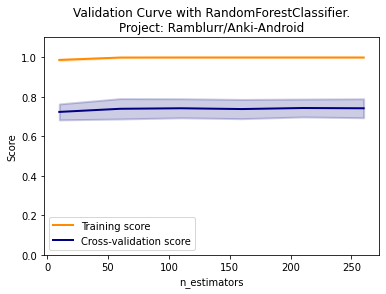

Length of df_clean: 652



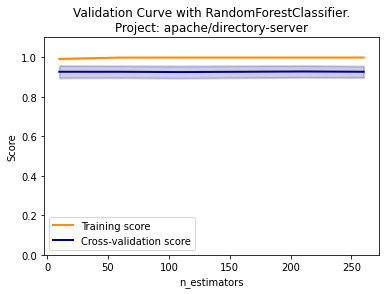

Length of df_clean: 2460



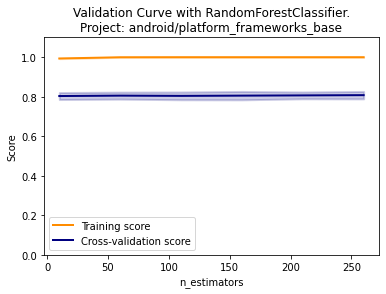

Length of df_clean: 1012



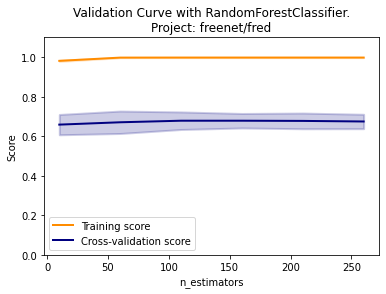

Length of df_clean: 1368



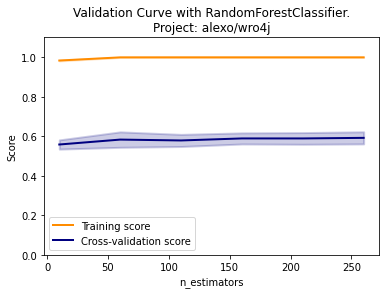

In [245]:
for project in projects[:5]:
    classifier_utils.get_validation_curve(project, rf, 'n_estimators',
                                      # [10, 50, 100, 150, 200, 300],
                                      np.arange(10, 300, 50),
                                      non_features_columns)



In [233]:
import importlib
importlib.reload(classifier_utils)

<module 'classifier_utils' from '/Users/paulo/sandbox2/conflict-resolution-mining/scripts/exploratory_analysis/classifier_utils.py'>

In [246]:
# # result = classifier_utils.grid_search(projects[6], rf, parameters_rf, non_features_columns)
# # result
# estimator = rf
# parameters = parameters_rf
#
# proj = projects[6].replace("/", "__")
# print("\n", proj)
# proj_dataset = f"../../data/projects/{proj}-training.csv"
# df_proj = pd.read_csv(proj_dataset)
# df_clean = df_proj.dropna()
# print(f"Length of df_clean: {len(df_clean)}")
# if len(df_clean) >= 10:
#     y = df_clean["developerdecision"].copy()
#     df_clean_features = df_clean.drop(columns=['developerdecision']) \
#                                 .drop(columns=non_features_columns)
#     features = list(df_clean_features.columns)
#     X = df_clean_features[features]
#     clf = GridSearchCV(estimator, parameters, verbose=1, cv=10)
#     clf.fit(X, y)
#     print('\n', "Best params and score:", clf.best_params_, clf.best_score_, '\n',
#           # clf.cv_results_,
#           sep='\n')
# else:
#     print(None)

# Random Forest (XGBoost)

### Base classifier

In [250]:
rf_xg = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')


In [ ]:
result_rf_xg = classifier_utils.ProjectsResults(rf_xg, projects, non_features_columns, drop_na=False)

In [ ]:
report_rf_xg = result_rf_xg.get_report_df()

report_rf_xg

### Inspect project

In [ ]:
project = result_rf_xg.get_project('alexo__wro4j')

In [ ]:
display(project.get_scores_df())
display(display(classifier_utils.plot_classification_report(project.scores)))

### Tuning hyperparameters (TODO)

In [251]:
print("Hyperparameters of Random Forest:")

rf_xg.get_params()

Hyperparameters of Random Forest:


{'colsample_bynode': 0.2,
 'learning_rate': 1,
 'reg_lambda': 1e-05,
 'subsample': 0.9,
 'use_label_encoder': True,
 'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 99,
 'reg_alpha': None,
 'scale_pos_weight': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eval_metric': 'mlogloss'}

#### Using GridSearch to explore combinations of hyperparameters in one project

In [256]:
parameters_rf_xg = {
                # 'criterion':('gini', 'entropy'),
#               'min_samples_leaf':[1, 2, 3],
              'max_depth':[None, 10, 20, 30],
              'n_estimators': [50, 100, 150]
              # 'n_estimators': [100, 200]
                 }

proj = projects[0]

result_rf = classifier_utils.grid_search(proj, rf_xg, parameters_rf_xg, non_features_columns)

df_gridsearch_rf = pd.DataFrame(result_rf)\
    .filter(regex=("param_.*|mean_test_score|std_test_score|rank_test_score"))\
    .sort_values(by=['rank_test_score'])

df_gridsearch_rf.insert(0, 'project', proj)

df_gridsearch_rf



Length of df_clean: 759
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best params and score:
{'max_depth': 20, 'n_estimators': 100}
0.7312280701754387




,project,param_max_depth,param_n_estimators,mean_test_score,std_test_score,rank_test_score
7,Ramblurr/Anki-Android,20,100,0.731228,0.048924,1
10,Ramblurr/Anki-Android,30,100,0.731228,0.048924,1
4,Ramblurr/Anki-Android,10,100,0.729912,0.049635,3
6,Ramblurr/Anki-Android,20,50,0.729895,0.046863,4
9,Ramblurr/Anki-Android,30,50,0.729895,0.046863,4
5,Ramblurr/Anki-Android,10,150,0.728596,0.042868,6
8,Ramblurr/Anki-Android,20,150,0.728596,0.047831,7
11,Ramblurr/Anki-Android,30,150,0.728596,0.047831,7
3,Ramblurr/Anki-Android,10,50,0.725947,0.048841,9
2,Ramblurr/Anki-Android,None,150,0.718088,0.033089,10


### GridSearch of parameter n_estimators on first 10 projects

In [257]:
parameters_rf_xg = {
                # 'criterion':('gini', 'entropy'),
              # 'min_samples_leaf':[1, 2, 3],
              # 'max_depth':[None, 10, 20, 30],
              # 'n_estimators': [10, 50, 90, 100, 110, 150, 200]
              'n_estimators': [50, 100, 150, 200]
                 }

dfs = []

for project in projects[:10]:
    print("\n=== ", project, " ===")
    result = classifier_utils.grid_search(project, rf_xg, parameters_rf_xg, non_features_columns)
    if result != None:
        df_gridsearch_proj = pd.DataFrame(result)\
            .filter(regex=("param_.*|mean_test_score|std_test_score|rank_test_score"))\
            .sort_values(by=['rank_test_score'])
        df_gridsearch_proj.insert(0, 'project', project.replace("/", "__"))
        # print(df_gridsearch_proj)
        display(df_gridsearch_proj)
        dfs.append(df_gridsearch_proj)

large_df = pd.concat(dfs, ignore_index=True)

large_df


===  Ramblurr/Anki-Android  ===
Length of df_clean: 759
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 200}
0.7233684210526315




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
3,Ramblurr__Anki-Android,200,0.723368,0.039168,1
2,Ramblurr__Anki-Android,150,0.718088,0.033089,2
1,Ramblurr__Anki-Android,100,0.716772,0.040189,3
0,Ramblurr__Anki-Android,50,0.712807,0.037840,4



===  apache/directory-server  ===
Length of df_clean: 652
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 50}
0.9171794871794873




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,apache__directory-server,50,0.917179,0.022820,1
1,apache__directory-server,100,0.914126,0.027403,2
2,apache__directory-server,150,0.914126,0.027403,2
3,apache__directory-server,200,0.912611,0.025477,4



===  android/platform_frameworks_base  ===
Length of df_clean: 2460
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 50}
0.806910569105691




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,android__platform_frameworks_base,50,0.806911,0.019175,1
2,android__platform_frameworks_base,150,0.804065,0.015828,2
1,android__platform_frameworks_base,100,0.803252,0.019342,3
3,android__platform_frameworks_base,200,0.802033,0.019752,4



===  freenet/fred  ===
Length of df_clean: 1012
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 200}
0.6610949330227139




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
3,freenet__fred,200,0.661095,0.033974,1
2,freenet__fred,150,0.658134,0.030645,2
1,freenet__fred,100,0.655154,0.035889,3
0,freenet__fred,50,0.653194,0.029424,4



===  alexo/wro4j  ===
Length of df_clean: 1368
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 100}
0.5489158437097467




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,alexo__wro4j,100,0.548916,0.035079,1
3,alexo__wro4j,200,0.548910,0.034702,2
2,alexo__wro4j,150,0.547461,0.033472,3
0,alexo__wro4j,50,0.545250,0.033191,4



===  apache/lucene-solr  ===
Length of df_clean: 974
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 50}
0.6068167473174836




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,apache__lucene-solr,50,0.606817,0.051048,1
3,apache__lucene-solr,200,0.603734,0.049451,2
2,apache__lucene-solr,150,0.603724,0.047399,3
1,apache__lucene-solr,100,0.601662,0.054238,4



===  elastic/elasticsearch  ===
Length of df_clean: 0

===  getrailo/railo  ===
Length of df_clean: 572
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 50}
0.6904113732607381




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,getrailo__railo,50,0.690411,0.053828,1
2,getrailo__railo,150,0.686872,0.056505,2
3,getrailo__railo,200,0.681670,0.050095,3
1,getrailo__railo,100,0.679915,0.058751,4



===  atlasapi/atlas  ===
Length of df_clean: 782
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 100}
0.6380558260305096




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,atlasapi__atlas,100,0.638056,0.063174,1
2,atlasapi__atlas,150,0.636725,0.056073,2
3,atlasapi__atlas,200,0.636693,0.065857,3
0,atlasapi__atlas,50,0.631613,0.061705,4



===  hibernate/hibernate-orm  ===
Length of df_clean: 716
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params and score:
{'n_estimators': 200}
0.5770931142410016




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
3,hibernate__hibernate-orm,200,0.577093,0.056951,1
1,hibernate__hibernate-orm,100,0.570129,0.060381,2
2,hibernate__hibernate-orm,150,0.567351,0.060028,3
0,hibernate__hibernate-orm,50,0.565923,0.058355,4


,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,Ramblurr__Anki-Android,200,0.723368,0.039168,1
1,Ramblurr__Anki-Android,150,0.718088,0.033089,2
2,Ramblurr__Anki-Android,100,0.716772,0.040189,3
3,Ramblurr__Anki-Android,50,0.712807,0.037840,4
4,apache__directory-server,50,0.917179,0.022820,1
5,apache__directory-server,100,0.914126,0.027403,2
6,apache__directory-server,150,0.914126,0.027403,2
7,apache__directory-server,200,0.912611,0.025477,4
8,android__platform_frameworks_base,50,0.806911,0.019175,1
9,android__platform_frameworks_base,150,0.804065,0.015828,2


#### Validation Curves

##### parameter: n_estimators

n_estimators : int, default=100

The number of trees in the forest.

Length of df_clean: 759



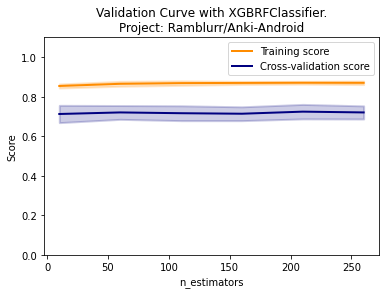

Length of df_clean: 652



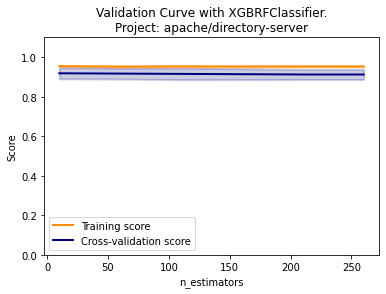

Length of df_clean: 2460



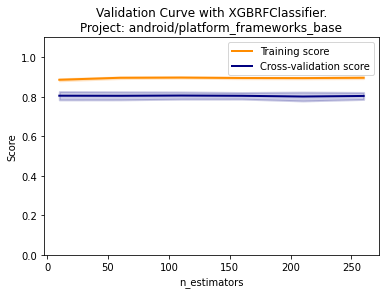

Length of df_clean: 1012



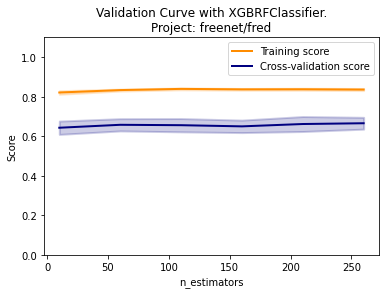

Length of df_clean: 1368



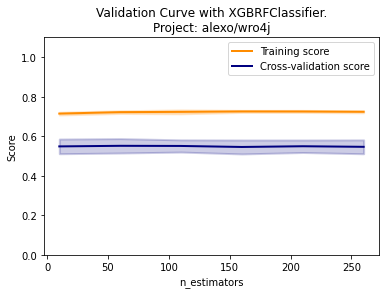

In [258]:
for project in projects[:3]:
    classifier_utils.get_validation_curve(project, rf_xg, 'n_estimators',
                                      # [10, 50, 100, 150, 200, 300],
                                      np.arange(10, 300, 50),
                                      non_features_columns)



# Tuned algorithms' comparison (TODO)

In [247]:
# import importlib
# importlib.reload(classifier_utils)
#
# # setup the algorithms with the desired parameters
# algorithms = {}
# algorithms['sklearn-decisionTree'] = DecisionTreeClassifier(min_samples_split=5, random_state=99)
# # algorithms['sklearn-adaboost'] = AdaBoostClassifier(n_estimators=100, random_state=99)
# algorithms['sklearn-randomForest'] = RandomForestClassifier(random_state=99)
# # algorithms['xgBoost-randomForest'] = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')
#
#
# results = []
# for project in projects:
#     for algorithm_name, algorithm in algorithms.items():
#         row = []
#         project_results = classifier_utils.evaluate_project(project, non_features_columns, algorithm)
#         result = project_results.results
#         precision = result.iloc[0]['precision']
#         recall = result.iloc[0]['recall']
#         f1_score = result.iloc[0]['f1-score']
#         accuracy = result.iloc[0]['accuracy']
#         majority_class = result.iloc[0]['baseline (majority)']
#         improvement = result.iloc[0]['improvement']
#         row = [project, algorithm_name, precision, recall, f1_score, accuracy, majority_class, improvement]
#         results.append(row)
#
# results = pd.DataFrame(results, columns=['project', 'algorithm', 'precision', 'recall', 'f1-score', 'accuracy', 'baseline (majority)', 'improvement'])
# results.sort_values('improvement', ascending=False)
# # print(results)
# # pd.concat(results, ignore_index=True)

## Comparing algorithms' reports

First let's merge the reports from Decision Tree, Random Forest and Random Forest XGBoost in a big table.

In [ ]:
df_inner_dt_rf = pd.merge(report_dt, report_rf, on='project', how='inner', suffixes=('_dt', '_rf'))

df_xg = report_rf_xg.add_suffix("_xg").rename(columns={"project_xg": "project"})

df_inner_dt_rf_xg = pd.merge(df_inner_dt_rf,
                             df_xg,
                             on='project', how='inner')

df_inner_dt_rf_xg


### How much accuracy improvement does each algorithm provide to the projects?

In [ ]:
improvements = df_inner_dt_rf_xg.filter(regex=("project|improvement.*"))

# improvements

In [ ]:
cm = sns.light_palette("green", as_cmap=True)

improvements.style.background_gradient(cmap = cm).format({'improvement_dt' : "{:.2%}",
                           'improvement_rf' : "{:.2%}",
                           'improvement_xg': "{:.2%}"})

## For each project, which algorithm provides the highest accuracy improvement?

In [ ]:
winner_algo = improvements.set_index('project').idxmax(axis=1)

winner_algo

## In how many projects does each algorithm provide the highest accuracy improvement?

In [ ]:
winner_algo.groupby(winner_algo).size().sort_values(ascending=False)
